In [9]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift, ifft2, ifftshift


def fft_focus_measure(image, low_freq_radius=20):
    """
    Spatial-domain focus measure using FFT band-pass energy.
    """
    image = image.astype(np.float32)
    h, w = image.shape

    # Forward FFT
    F = fftshift(fft2(image))

    # Frequency grid
    cy, cx = h // 2, w // 2
    y, x = np.ogrid[:h, :w]
    dist = np.sqrt((y - cy)**2 + (x - cx)**2)

    # High-pass mask
    mask = dist > low_freq_radius

    # Band-passed power spectrum
    power = (np.abs(F) ** 2) * mask

    # Back to spatial domain (THIS IS THE FIX)
    focus_spatial = np.real(
        ifft2(ifftshift(power))
    )

    return focus_spatial


def shape_from_focus_fft(image_stack, low_freq_radius=20):
    """
    FFT-based Shape from Focus.

    Parameters
    ----------
    image_stack : numpy array (N, H, W)
        Stack of focal images.
    low_freq_radius : int
        Radius for low-frequency suppression.

    Returns
    -------
    depth_map : 2D numpy array
        Index of best focus per pixel.
    focus_map : 2D numpy array
        Maximum focus measure.
    """
    num_levels, h, w = image_stack.shape

    best_focus = np.zeros((h, w), dtype=np.float32)
    depth_map = np.zeros((h, w), dtype=np.int32)

    for i in range(num_levels):
        print(f"Processing focus level {i+1}/{num_levels}")

        img = image_stack[i].astype(np.float32)

        fm = fft_focus_measure(img, low_freq_radius)

        # Compare and update
        mask = fm > best_focus
        best_focus[mask] = fm[mask]
        depth_map[mask] = i

    return depth_map, best_focus

(76, 2072, 2072)
Processing focus level 1/76
Processing focus level 2/76
Processing focus level 3/76
Processing focus level 4/76
Processing focus level 5/76
Processing focus level 6/76
Processing focus level 7/76
Processing focus level 8/76
Processing focus level 9/76
Processing focus level 10/76
Processing focus level 11/76
Processing focus level 12/76
Processing focus level 13/76
Processing focus level 14/76
Processing focus level 15/76
Processing focus level 16/76
Processing focus level 17/76
Processing focus level 18/76
Processing focus level 19/76
Processing focus level 20/76
Processing focus level 21/76
Processing focus level 22/76
Processing focus level 23/76
Processing focus level 24/76
Processing focus level 25/76
Processing focus level 26/76
Processing focus level 27/76
Processing focus level 28/76
Processing focus level 29/76
Processing focus level 30/76
Processing focus level 31/76
Processing focus level 32/76
Processing focus level 33/76
Processing focus level 34/76
Proces

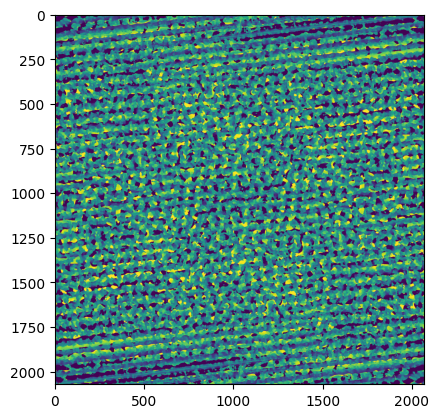

In [10]:
stack=io.imread(r'C:\Users\PILLLARD-DOR\Documents\TEMPO\data\multi_focus\raw\contaminated\Position_0001.tif')
print(stack.shape)

depth_map, focus_map = shape_from_focus_fft(stack, low_freq_radius=30)
plt.imshow(depth_map,cmap="viridis")
plt.show()

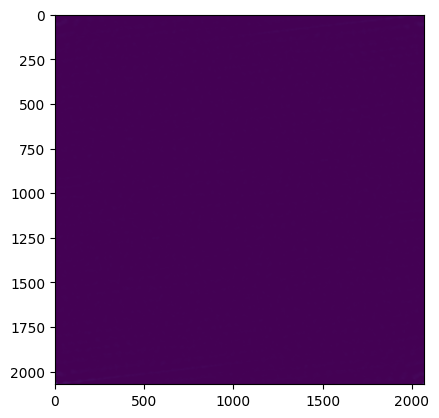

In [11]:
plt.imshow(focus_map,cmap='viridis')
plt.show()